In [1]:
import os
os.chdir('..')

In [2]:
import articles as art
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [6]:
classifier_file = open('pickles/svm_classifier_prob', 'rb')
classifier = pickle.load(classifier_file)
classifier_file.close()
vectorizer_file = open('pickles/vectorizer_2','rb')
vectorizer = pickle.load(vectorizer_file)
vectorizer_file.close()

In [7]:
articles = art.load_articles()

In [8]:
disagreement = 0
confidences = {'-1': [], '0': [], '1': []}
i = 0
for article in articles:
    i += 1
    if i % 5000 == 0:
        print(i/len(articles))
    review_vector = vectorizer.transform([article.body])
    
    probabilities = classifier.predict_proba(review_vector)
    classification = classifier.predict(review_vector)[0]
    classification_prob = np.argmax(probabilities) - 1
    if(int(classification) != classification_prob):
        disagreement += 1
    else:
        confidence = np.max(probabilities)
        confidences[classification].append([confidence, i-1])
        
        
print("Disagreement between probabilities and classification:", disagreement, "/", len(articles))

0.14529815180750902
0.29059630361501804
0.435894455422527
0.5811926072300361
0.726490759037545
0.871788910845054
Disagreement between probabilities and classification: 6632 / 34412


In [10]:
for classification, classified_articles in confidences.items():
    print("Top 10 most confident classifications in class:", classification)
    top_10 = sorted(classified_articles, key=lambda x: x[0])[-11:]
    print(top_10)
    article_ids = [article[1] for article in top_10]
    for article_id in article_ids:
        article = articles[article_id]
        print(article)

Top 10 most confident classifications in class: -1
[[0.9999079978820758, 18307], [0.9999161186499747, 23295], [0.9999235555125868, 13900], [0.9999236118221466, 26101], [0.9999325351784119, 22969], [0.999937884451687, 26388], [0.9999667872310974, 23163], [0.9999679859060179, 13117], [0.9999756993304656, 14515], [0.9999756993304656, 15997], [0.9999786230558463, 20355]]
<Article {headline: 'House price rise adds to pressure on Bank to increase rates', date: 8-2006, source: guardian}>
<Article {headline: 'Recession threatens to derail Labour's anti-poverty drive', date: 12-2008, source: guardian}>
<Article {headline: 'MPC ready to counter downturn with rate cut', date: 9-2002, source: guardian}>
<Article {headline: 'Federal Reserve holds interest rates again as US recovery remains fragile', date: 6-2011, source: guardian}>
<Article {headline: 'Week in which global catastrophe was averted', date: 10-2008, source: guardian}>
<Article {headline: 'Inflation pushes UK Misery Index to highest si

In [8]:
negative_confidences = [confidence[0] for confidence in confidences['-1']]
neutral_confidences = [confidence[0] for confidence in confidences['0']]
positive_confidences = [confidence[0] for confidence in confidences['1']]

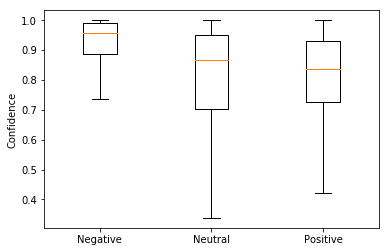

In [14]:
fig, ax = plt.subplots()
ax.boxplot([negative_confidences, neutral_confidences, positive_confidences], showfliers=False)
ax.set_xticklabels(["Negative", "Neutral", "Positive"])
ax.set_ylabel('Confidence')
plt.savefig("SVM_confidence.png")
plt.show()
